In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('monthly_milk_production.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'

In [6]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

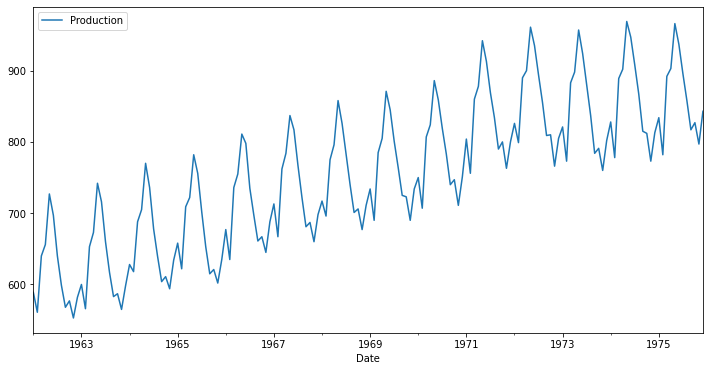

In [7]:
df.plot(figsize=(12,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

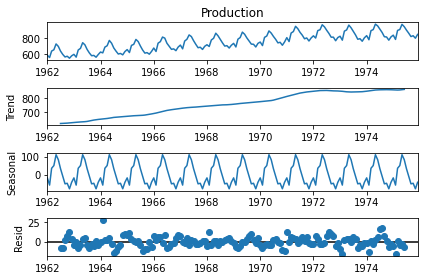

In [9]:
results = seasonal_decompose(df['Production'])
results.plot();

In [10]:
len(df)

168

In [11]:
train = df.iloc[:156]
test = df.iloc[156:]
#use all values except last 12 months

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(),df.tail()
#we can see different scales of magnitude

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [16]:
!pip install tensorflow

In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
# define generator
n_input = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
#reminder: show team how the generator works
X,y = generator[0]
print(f'Given the Array \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
[[0.24759615]]


In [22]:
X.shape

(1, 3, 1)

In [23]:
# We do the same thing, but now instead for 12 months
n_input=12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
n_features = 1

In [26]:
# define model

#100 nodes, 1 dense
model0 = Sequential()
model0.add(LSTM(100, activation='relu',input_shape=(n_input,n_features)))
model0.add(Dense(1))
model0.compile(optimizer='adam', loss='mse')

#200 nodes, 1 dense
model1 = Sequential()
model1.add(LSTM(200, activation='relu',input_shape=(n_input,n_features)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

#100 nodes, 2 dense
model2 = Sequential()
model2.add(LSTM(100, activation='relu',input_shape=(n_input,n_features)))
model2.add(Dense(2))
model2.compile(optimizer='adam', loss='mse')

#200 nodes, 2 dense
model3 = Sequential()
model3.add(LSTM(200, activation='relu',input_shape=(n_input,n_features)))
model3.add(Dense(2))
model3.compile(optimizer='adam', loss='mse')

In [27]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200)               161600    
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 162,002
Trainable params: 162,002
Non-trainable params: 0
_________________________________________________________________


In [29]:
#fit models
model0.fit(generator, epochs=50)
model1.fit(generator, epochs=50)
model2.fit(generator, epochs=50)
model3.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 0.0485
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 11/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 12/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 13/50
144/144 [====

144/144 [==============================] - 1s 2ms/step - loss: 0.0462
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 8/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 9/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 11/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 12/50
144/144 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 13/50
144/144 [===============

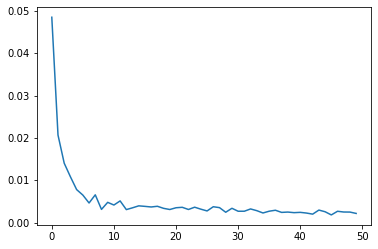

In [30]:
loss_per_epoch_0 = model0.history.history['loss']
plt.plot(range(len(loss_per_epoch_0)), loss_per_epoch_0)

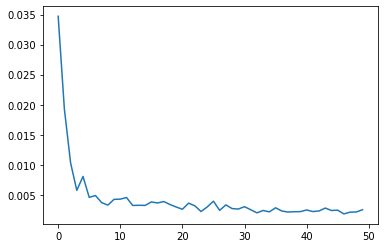

In [31]:
loss_per_epoch_1 = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch_1)), loss_per_epoch_1)

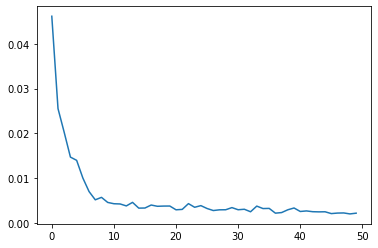

In [32]:
loss_per_epoch_2 = model2.history.history['loss']
plt.plot(range(len(loss_per_epoch_2)), loss_per_epoch_2)

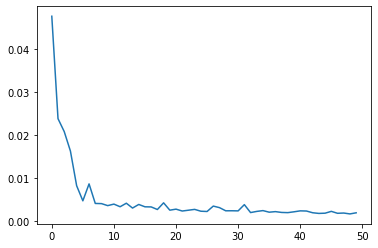

In [33]:
loss_per_epoch_3 = model3.history.history['loss']
plt.plot(range(len(loss_per_epoch_3)), loss_per_epoch_3)

In [34]:
last_train_batch = scaled_train[-12:]
last_train_batch.shape

(12, 1)

In [35]:
last_train_batch = last_train_batch.reshape( (1, n_input, n_features) )
last_train_batch.shape

(1, 12, 1)

In [36]:
model0.predict(last_train_batch)

array([[0.6275967]], dtype=float32)

In [37]:
model1.predict(last_train_batch)

array([[0.6426742]], dtype=float32)

In [38]:
model2.predict(last_train_batch)

array([[0.6553643, 0.6519134]], dtype=float32)

In [39]:
model3.predict(last_train_batch)

array([[0.6266781, 0.6203687]], dtype=float32)

In [40]:
scaled_test[0]

array([0.67548077])

In [41]:
predictions_model0 = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape( (1, n_input, n_features) )

for i in range(len(test)):
    #get the prediction value for the first batch
    current_pred = model0.predict(current_batch)[0]
    
    #append the prediction into the array
    predictions_model0.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,], [[current_pred]], axis=1)
    

In [42]:
predictions_model0

[array([0.6275967], dtype=float32),
 array([0.6297431], dtype=float32),
 array([0.7790666], dtype=float32),
 array([0.85567605], dtype=float32),
 array([0.9353321], dtype=float32),
 array([0.9172087], dtype=float32),
 array([0.855855], dtype=float32),
 array([0.76629984], dtype=float32),
 array([0.66641504], dtype=float32),
 array([0.62019444], dtype=float32),
 array([0.58186036], dtype=float32),
 array([0.6123296], dtype=float32)]

In [43]:
predictions_model1 = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape( (1, n_input, n_features) )

for i in range(len(test)):
    #get the prediction value for the first batch
    current_pred = model1.predict(current_batch)[0]
    
    #append the prediction into the array
    predictions_model1.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,], [[current_pred]], axis=1)

In [44]:
#ask team about this 
predictions_model2 = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape( (1, n_input, n_features) )

for i in range(1):
    #get the prediction value for the first batch
    current_pred = model2.predict(current_batch)[0]
    #current_pred = (current_pred[0] + current_pred[1]) / 2 

    #append the prediction into the array
    predictions_model2.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,2:,], [[current_pred]], axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 2

In [45]:
predictions_model1

[array([0.6426742], dtype=float32),
 array([0.598659], dtype=float32),
 array([0.77324754], dtype=float32),
 array([0.8284267], dtype=float32),
 array([0.94006914], dtype=float32),
 array([0.91476536], dtype=float32),
 array([0.8415896], dtype=float32),
 array([0.7512288], dtype=float32),
 array([0.6505884], dtype=float32),
 array([0.6200529], dtype=float32),
 array([0.56270874], dtype=float32),
 array([0.61549735], dtype=float32)]

In [46]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [47]:
true_preds_model0 = scaler.inverse_transform(predictions_model0)
true_preds_model1 = scaler.inverse_transform(predictions_model1)

In [48]:
true_preds_model0 

array([[814.08021736],
       [814.97312927],
       [877.09171486],
       [908.96123886],
       [942.0981617 ],
       [934.55880737],
       [909.03567505],
       [871.78073502],
       [830.22865486],
       [811.00088501],
       [795.05391121],
       [807.72911453]])

In [49]:
test['Model0'] = true_preds_model0 
test['Model1'] = true_preds_model1 

C:\Users\paisu\AppData\Local\Temp/ipykernel_59952/2414188945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Model0'] = true_preds_model0
C:\Users\paisu\AppData\Local\Temp/ipykernel_59952/2414188945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Model1'] = true_preds_model1


<AxesSubplot:xlabel='Date'>

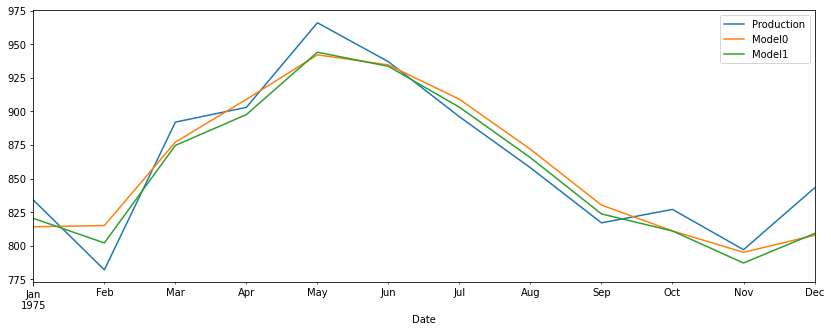

In [50]:
test.plot(figsize=(14,5))

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse0 = sqrt(mean_squared_error(test['Production'], test['Model0']))

rmse1 = sqrt(mean_squared_error(test['Production'], test['Model1']))

print(rmse0)
print(rmse1)

19.05628662539733
15.994789064710107
